## K Mean Clustering

In [75]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [76]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# import the data in features
X = df[['age', 'fare']]
X.age.fillna(value=X['age'].mean(), inplace=True)

#scaled data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


C:\Users\Buzz Tech\AppData\Local\Temp\ipykernel_11944\2733604877.py:6: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\Buzz Tech\AppData\Local\Temp\ipykernel_11944\2733604877.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [77]:
X.head()

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [78]:
X_scaled

array([[-0.5924806 , -0.50244517],
       [ 0.63878901,  0.78684529],
       [-0.2846632 , -0.48885426],
       ...,
       [ 0.        , -0.17626324],
       [-0.2846632 , -0.04438104],
       [ 0.17706291, -0.49237783]])

In [79]:
# perform  clustering
model = KMeans(n_clusters=3)
model.fit(X_scaled)

# assign cluster labels to the data
df['cluster']= model.labels_





In [80]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,cluster
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0


In [81]:
df['cluster'].unique()

array([1, 0, 2])

<function matplotlib.pyplot.show(close=None, block=None)>

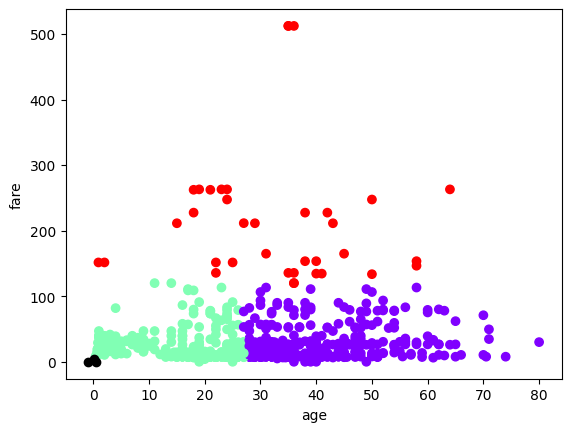

In [82]:
plt.scatter(df['age'], df['fare'], c=df['cluster'], cmap='rainbow')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color='black')
plt.xlabel('age')
plt.ylabel('fare')
plt.show

In [83]:
import plotly.express as px
fig=px.scatter(df, x='age', y='fare', color='cluster')
fig.show()

In [84]:
import plotly.express as px
fig=px.scatter_3d(df, x='age', y='fare', z='pclass', color='cluster')
fig.show()

In [85]:
fig = px.parallel_coordinates(df, color='cluster', title='Titanic Cluster')
fig.show()

In [86]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [87]:
pip install pickle

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [88]:
#saving the model
import joblib
joblib.dump(model, 'KMeansClustering.joblib')

['KMeansClustering.joblib']

In [89]:
#load the saved model
model_loaded = joblib.load('KMeansClustering.joblib')

In [90]:
import seaborn as sns
df_1 = sns.load_dataset('tips')
df_1


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [113]:
X = df_1.drop(columns=['sex'])
y = df_1['sex']

In [114]:
df_1.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [115]:
df_1.dtypes

total_bill     float64
tip            float64
sex           category
smoker           int64
day              int64
time             int64
size             int64
dtype: object

In [116]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df_1['smoker'])

df_1['smoker']=le.transform(df_1['smoker'])

In [117]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df_1['day'])

df_1['day']=le.transform(df_1['day'])

In [118]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df_1['time'])

df_1['time']=le.transform(df_1['time'])

In [119]:
df_1

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,0,2,0,2
1,10.34,1.66,Male,0,2,0,3
2,21.01,3.50,Male,0,2,0,3
3,23.68,3.31,Male,0,2,0,2
4,24.59,3.61,Female,0,2,0,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,0,1,0,3
240,27.18,2.00,Female,1,1,0,2
241,22.67,2.00,Male,1,1,0,2
242,17.82,1.75,Male,0,1,0,2


In [120]:
X.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,0,2,0,2
1,10.34,1.66,0,2,0,3
2,21.01,3.50,0,2,0,3
3,23.68,3.31,0,2,0,2
4,24.59,3.61,0,2,0,4


In [121]:
# ipmort libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

In [122]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model= model.fit(X, y)

In [123]:
joblib.dump(model, 'tipswalamodel.joblib')

['tipswalamodel.joblib']

In [124]:
joblib.load('tipswalamodel.joblib')

DecisionTreeClassifier()

In [135]:
import pickle
#save the model
with open('model.pkl','wb') as f:
    pickle.dump(model,f)
    
    
 #load the model
 with open('model.pkl', 'rb') as f:
     loaded_model = pickle.load(f)   

IndentationError: unindent does not match any outer indentation level (<string>, line 8)